# Визуализация данных

**Цель работы:** изучение программных средств для визуализации наборов данных.

**Вариант:** 14

**Задачи:**

- изучение основных типов графиков библиотеки matplotlib;
- изучение основных типов графиков библиотеки seaborn;
- получение навыков анализа данных по визуальным представлениям данных.

## Пингвины

Мной был выбран набор данных под названием "Penguins" по ссылке https://www.kaggle.com/datasets/larsen0966/penguins/. Эти данные являются результатом анализа различий пингвинов, обитающих в Антарктиде. В результате анализа определено 8 компонентов:

1. ***species*** - вид пингвинов;
2. ***island*** - остров в архипелаге Палмера, Антарктида (Биско, Дрим или Торгерсен);
3. ***bill_length_mm*** - длина клюва в миллиметрах;
4. ***bill_depth_mm*** -глубина клюва;
5. ***flipper_length_mm*** - длина ласт;
6. ***body_mass_g*** - вес пингвина;
7. ***sex*** - пол;
8. ***year*** - год.

### Загрузка данных

In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_path = "./penguins/penguins.csv"
data = pd.read_csv(data_path)
data.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [5]:
data.columns

Index(['Unnamed: 0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

### Визуализация количественных признаков

Графики, используемые при анализе данных, делят не по библиотекам, с использованием которых они строятся, а по типам признаков, для анализа которых предназначены графики.

Для построения гистограммы воспользуемся методом hist() класса DataFtrame. На самом деле используется метод из библиотеки matplotlib.

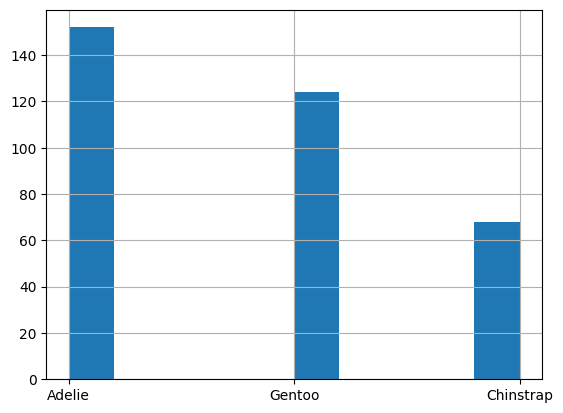

In [6]:
data['species'].hist();

In [35]:
class_counts = data['species'].value_counts()
print(class_counts)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


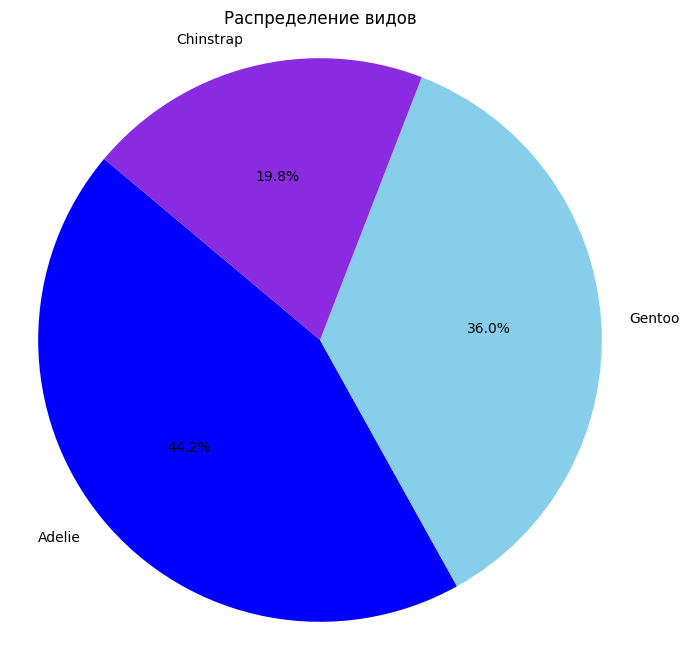

In [39]:
class_labels=['Adelie', 'Gentoo', 'Chinstrap']
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'skyblue', 'BlueViolet'])
plt.title("Распределение видов")
plt.axis('equal')
plt.show()

Метод hist() можно использовать для построения гистограмм по нескольким признакам. При этом неколичественные признаки игнорируются.

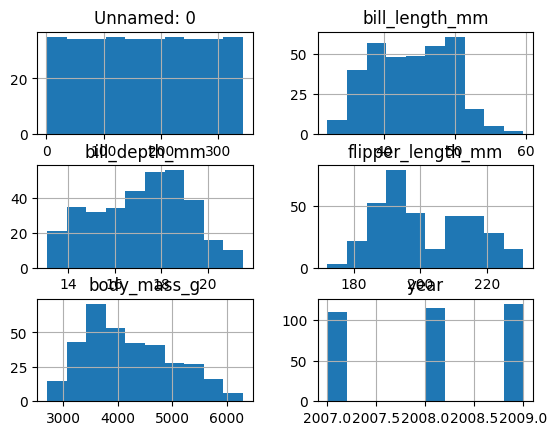

In [7]:
data.hist();

Аналогичный тип графика можно получить с использованием matplotlib

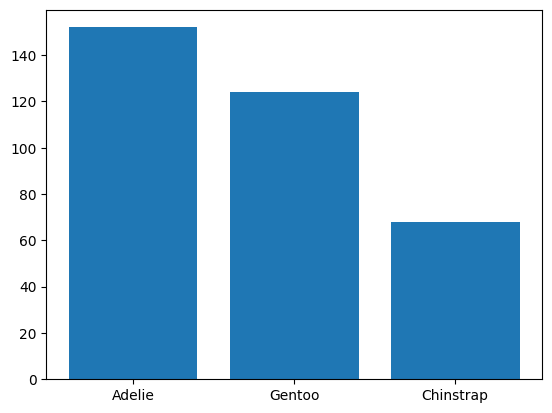

In [8]:
hist = data['species'].value_counts()
plt.bar(hist.index, hist);

Использование matplotlib для представления распределения значений признака

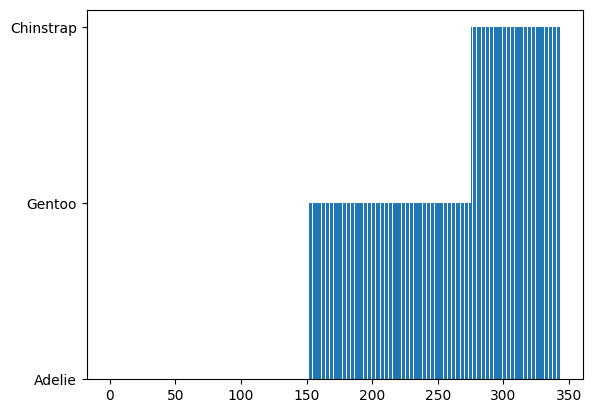

In [9]:
plt.bar(data.index, data['species'])
plt.show()

Отсортируем по относительной частоте появления каждого вида в различных местах обитания.

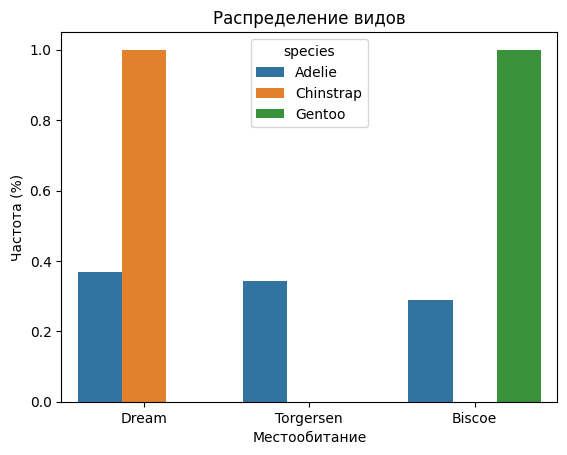

In [42]:
df_habitat = data['island'].groupby(data['species']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()
sns.barplot(data = df_habitat,x='island',y='frequency',hue='species')
plt.xlabel('Местообитание')
plt.ylabel('Частота (%)')
plt.title("Распределение видов");

Один из эффективных типов графиков для анализа количественных признаков – это «ящик с усами» (boxplot).

<AxesSubplot: ylabel='bill_length_mm'>

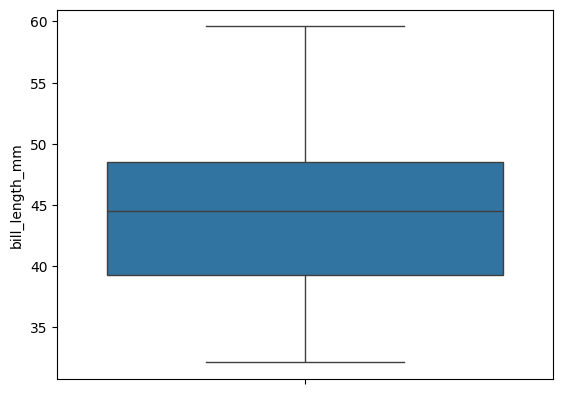

In [11]:
sns.boxplot(data['bill_length_mm'])

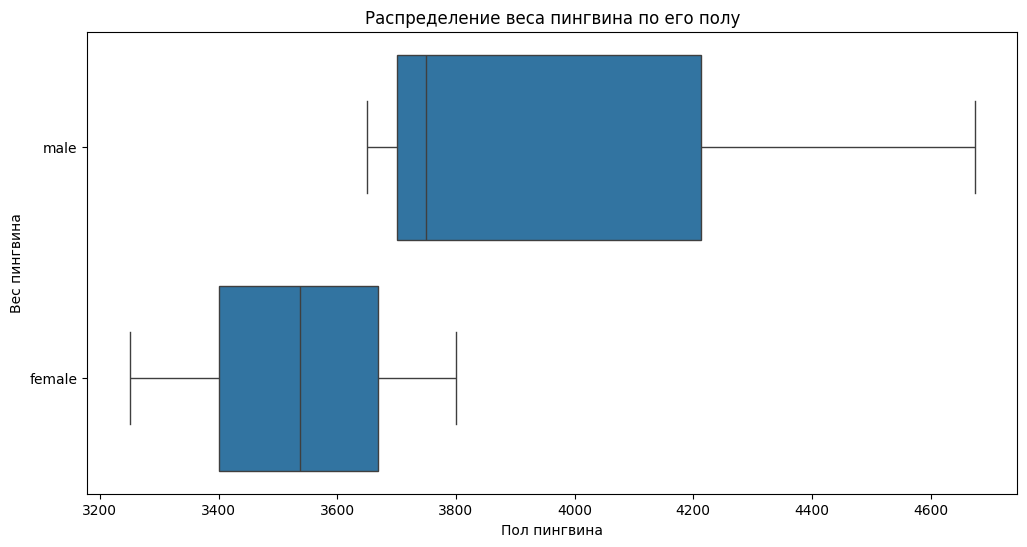

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="body_mass_g", y="sex", data=data.head(10))
plt.title("Распределение веса пингвина по его полу")
plt.xlabel("Пол пингвина")
plt.ylabel("Вес пингвина")
plt.show()

### Визуализация категориальных признаков

Типичным категориальным признаком в анализируемом наборе данных является «Остров» (island). Определим "популярный" остров:

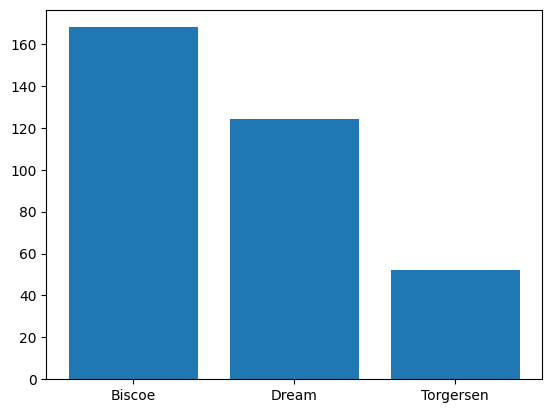

In [14]:
hist = data['island'].value_counts()
plt.bar(hist.index, hist);

Под категориальный признак подходит также «Вид» (species)

In [15]:
data['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Метод countplot() из библиотеки seaborn, строит гистограммы, но не по сырым данным, а по расчитанному количеству разных значений признака

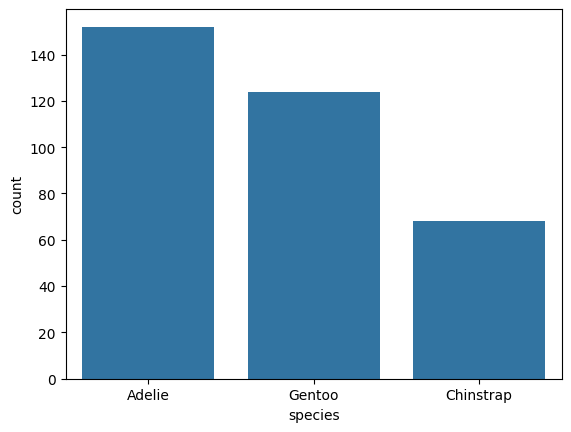

In [16]:
sns.countplot(x = 'species', data = data);

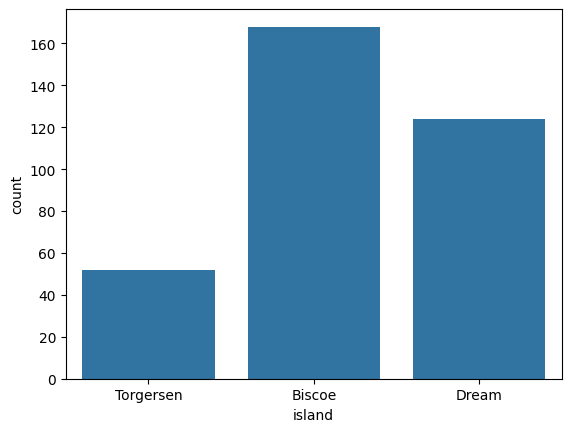

In [17]:
sns.countplot(x = 'island', data = data);

Визуализация пяти самых тяжелых пингвинов

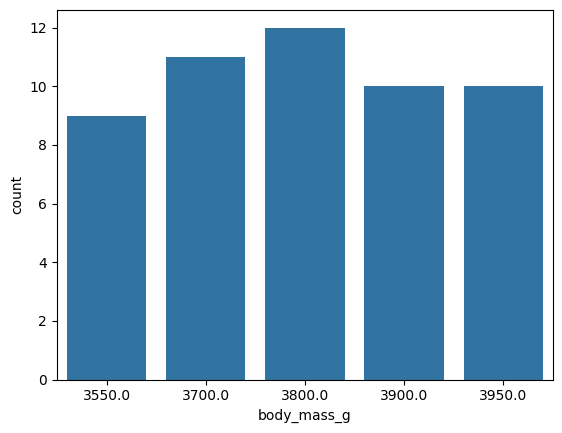

In [20]:
sns.countplot(x = data[data['body_mass_g'].isin(data['body_mass_g'].value_counts().head(5).index)]['body_mass_g'], data = data);

### Визуализация соотношения количественных признаков

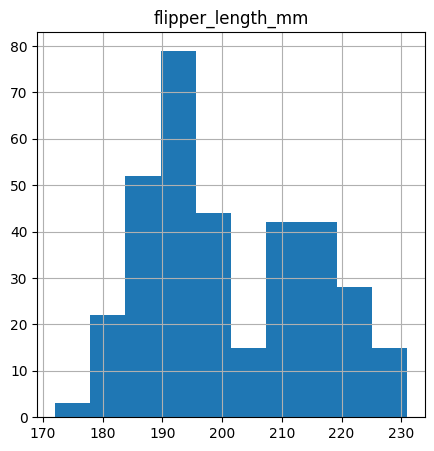

In [52]:
feats=[f for f in data.columns if 'flipper_length_mm' in f]
data[feats].hist(figsize=(5,5));

Часто используют попарное сравнение признаков для обеспечения широкого взгляда на набор данных. На диаганальных графиках представлены гистограммы распределения отдельного признака, на внедиаганальных позициях – попарные распределения:

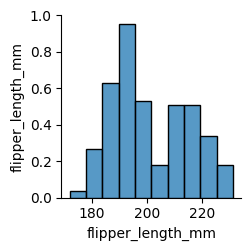

In [53]:
sns.pairplot(data[feats]);

Можно реализовать более сложные графики. Например, если требуется добавить к существующим признакам, целевой признак species (вид) и раскрасить разные типы элементов, то можно воспользоваться попарными распределениями, но с отображением подмножеств отказов

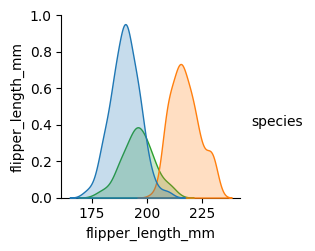

In [59]:
sns.pairplot(data[feats+['species']], hue='species');

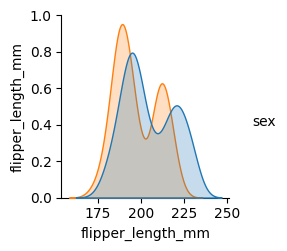

In [58]:
sns.pairplot(data[feats+['sex']], hue='sex');

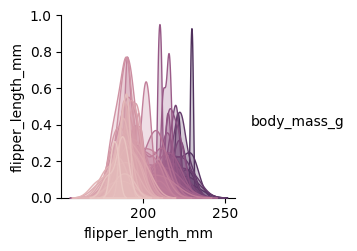

In [57]:
sns.pairplot(data[feats+['body_mass_g']], hue='body_mass_g');

Можно использовать скрипты, для выделения больших коэффициентов корреляции. Но лучше использовать специальный тип графика – heatmap.

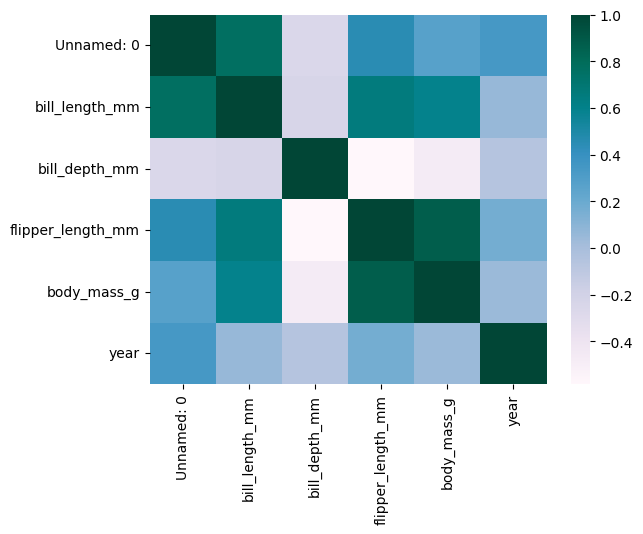

In [30]:
sns.heatmap(data.corr(numeric_only=True), cmap=plt.cm.PuBuGn);

Из карты heatmap видно, что некоторые признаки коррелируют: например, сильная корреляция в парах описывающих массу тела и длину ласт. Из таких пар можно удалить один признак

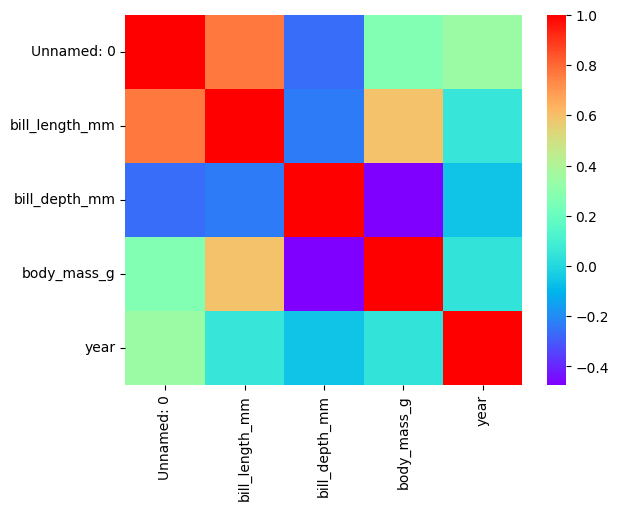

In [62]:
feats=[f for f in data.columns if 'flipper_length_mm' in f]
data_uncorr = data.drop(feats, axis=1)
sns.heatmap(data_uncorr.corr(numeric_only=True), cmap=plt.cm.rainbow);

### Контрольные вопросы

<u>**1. Перечислите функции Python, которые были изучены в рамках данной лабораторной работы и которые используются для визуализации данных.**

Python предлагает множество библиотек и инструментов для визуализации данных. Вот некоторые из наиболее популярных библиотек и функций для визуализации данных в Python:

- **Matplotlib:** Это одна из наиболее популярных библиотек для создания различных видов графиков, включая линейные графики, столбчатые графики, круговые диаграммы и многие другие.

- **Seaborn:** Это библиотека на основе Matplotlib, предназначенная для упрощения создания информативных и красочных статистических графиков. Она поддерживает такие виды графиков, как ящик с усами, тепловые карты и графики плотности распределения.

- **Pandas:** Библиотека Pandas обладает встроенными функциями визуализации, такими как `.plot()`, что позволяет создавать простые графики непосредственно из DataFrame.

- **Plotly:** Это библиотека для интерактивной визуализации данных. Она позволяет создавать веб-графику, включая интерактивные графики и графики 3D.

- **Bokeh:** Эта библиотека также предоставляет средства для создания интерактивных графиков, особенно подходит для создания веб-приложений с визуализацией данных.

- **Altair:** Altair - это библиотека для декларативной визуализации. Она позволяет создавать графику на основе объявления данных и их взаимосвязей.

- **ggplot:** Библиотека ggplot вдохновлена системой графики ggplot2 в языке программирования R и предоставляет схожий подход к созданию графики.

- **WordCloud:** WordCloud - это библиотека для создания облаков слов, которые отображают частоту слов в текстовых данных.

- **Holoviews:** Holoviews предоставляет высокоуровневый интерфейс для создания интерактивных графиков, ориентированных на данные.

- **NetworkX:** Если вам нужно визуализировать сетевые данные и графы, библиотека NetworkX предоставляет такие возможности.

Это только небольшой перечень библиотек и функций для визуализации данных в Python. Выбор конкретной библиотеки зависит от ваших потребностей и предпочтений.

<u>**2. Какая библиотека python предназначена для управления наборами данных: numpy, pandas, sklearn, opencv, matplotlib?**

Библиотека Python, предназначенная для управления наборами данных, это ***pandas***. Pandas обеспечивает мощные средства для обработки, анализа и манипуляции табличными данными.

<u>**3. Какая стратегия является нежелательной при обработке пропусков в данных?**

<u>**а) замена пропущенных значений в столбце медианным значением по данному столбцу;**

<u>**б) удаление строк, содержащих пропуски в данных;**

<u>**в) замена пропущенных значений в столбце средним арифметическим значением по данному столбцу;**

<u>**г) замена пропущенных значений в столбце наиболее часто встречающимся значением по данному столбцу;**

Нежелательной стратегией при обработке пропусков в данных является:

***б) удаление строк, содержащих пропуски в данных.***

Удаление строк с пропусками может привести к потере значительного количества данных и искажению результатов анализа. 

<u>**4. Обоснуйте ответ на следующую проблему предварительной обработки данных: имеется независимая категориальная переменная 
y, которая представляет собой категориальный признак, опеределнный на домене {C#, Java, Python, R}. Нужно ли применять к данному целевому признаку OneHotEncoder?**

Применение OneHotEncoder к целевому признаку (категориальной переменной) зависит от конкретной задачи машинного обучения. Обычно OneHotEncoder используется для преобразования категориальных признаков, но в случае целевой переменной y применение OneHotEncoding может иметь свои особенности и зависит от типа задачи.

В случае задачи регрессии, где целевой признак является количественной переменной (например, предсказание численного значения), OneHotEncoding не требуется, так как алгоритмы регрессии могут работать с числовыми значениями.

Однако, в случае задачи классификации, где целевой признак представляет собой категориальный признак (например, предсказание класса из {C#, Java, Python, R}), применение OneHotEncoder может быть полезным. Это позволяет алгоритму классификации корректно интерпретировать целевую переменную и проводить предсказания для каждой категории независимо.

Кратко:

- В задачах регрессии: OneHotEncoding целевой переменной не требуется.
- В задачах классификации: OneHotEncoding целевой переменной может быть полезным, особенно если алгоритм классификации требует числовых меток классов.

    
<u>**5. Какой код лучше использовать при загрузке данных из csv-файла?**

<u>**а) dataset = read_csv('data.csv')**

<u>**б) dataset = import('data.csv')**

<u>**в) dataset = read.csv('data.csv')**

<u>**г) dataset = import.csv('data.csv')**

<u>**д) dataset = read_xls('data.csv')**
    
    
Правильный ответ: а) dataset = pd.read_csv('data.csv').

Следует использовать pd.read_csv('data.csv'), чтобы импортировать данные из CSV-файла и создать объект DataFrame с помощью библиотеки pandas. Остальные варианты не являются корректными для загрузки CSV-файлов в pandas.